In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#eklesias202131181

In [2]:
img=cv2.imread('markajalan.jpg')
cv2.imshow('Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

#eklesias202131181

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 100, 150)

#eklesias202131181

Text(0.5, 1.0, 'Gambar\xa0Edges')

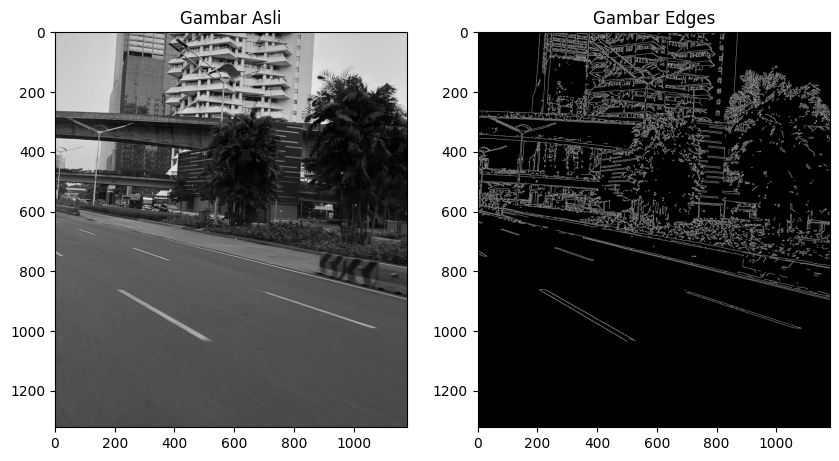

In [4]:
fig, axs = plt.subplots(1,2, figsize =(10,10))
ax = axs.ravel()

ax[0].imshow(gray, cmap= 'gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(edges, cmap ='gray')
ax[1].set_title('Gambar Edges')

#eklesias202131181

In [5]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

#eklesias202131181

In [6]:
edges = cv2.Canny(blur, 50, 150)

#eklesias202131181

In [7]:
mask = np.zeros_like(edges)

#eklesias202131181

In [8]:
height, width = img.shape[:2]
roi_vertices = [(0, height), (width/2, height/2), (width, height)]
mask_color = 255
cv2.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

#eklesias202131181

In [14]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=400, minLineLength=40, maxLineGap=40)
Canny_image = cv2.Canny(gray, 200, 400)

#eklesias202131181

In [15]:
line_img = np.zeros_like(img)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 10)
    
#eklesias202131181

In [18]:
final_img = cv2.addWeighted(img, 0.8, line_img, 1, 0)
#eklesias202131181

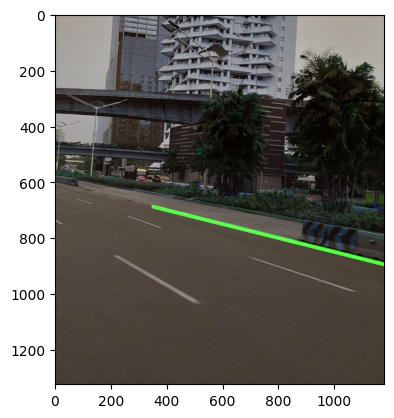

In [19]:
plt.imshow(final_img)
plt.show()

#eklesias202131181